In [1]:
import qiskit
from qiskit import IBMQ
from qiskit import(QuantumCircuit, execute, Aer)
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.tools.monitor import job_monitor
%matplotlib inline


In [2]:
IBMQ.save_account('a6d0c39d0bff682618529fe7800ff74e68574b8ee0ed4c18ff2aa21db70c712acbd7d16ec7bb2097bf3be917670160908e07f762ed51e347c7757e700329b3ad')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_vigo')

Credentials already present. Set overwrite=True to overwrite.


In [3]:
qiskit.__version__
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.1',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.5',
 'qiskit-aqua': '0.6.2',
 'qiskit': '0.14.1'}

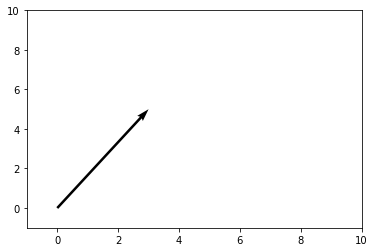

In [4]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()


In [5]:
circuit = QuantumCircuit(4,4)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.draw()
circuit.measure([0,1], [1,2])
print(circuit)

        ┌───┐             ┌─┐
q_0: |0>┤ H ├──■────■─────┤M├
        └───┘┌─┴─┐  │  ┌─┐└╥┘
q_1: |0>─────┤ X ├──┼──┤M├─╫─
             └───┘┌─┴─┐└╥┘ ║ 
q_2: |0>──────────┤ X ├─╫──╫─
                  └───┘ ║  ║ 
q_3: |0>────────────────╫──╫─
                        ║  ║ 
 c_0: 0 ════════════════╬══╬═
                        ║  ║ 
 c_1: 0 ════════════════╬══╩═
                        ║    
 c_2: 0 ════════════════╩════
                             
 c_3: 0 ═════════════════════
                             


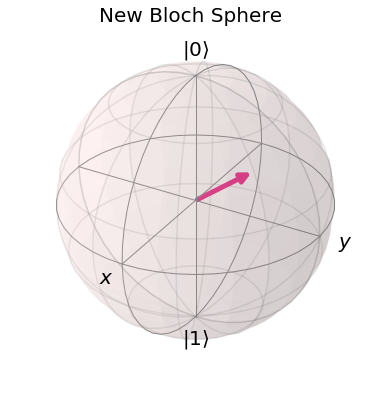

In [13]:
plot_bloch_vector([1,1,1], title="New Bloch Sphere")


Total count for 00 and 11 are: {'0010': 20, '0000': 480, '0110': 479, '0100': 21}


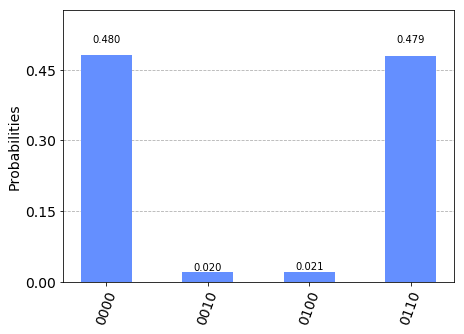

In [14]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
plot_histogram(counts)



Total count for 00 and 11 are: {'0000': 498, '0110': 502}


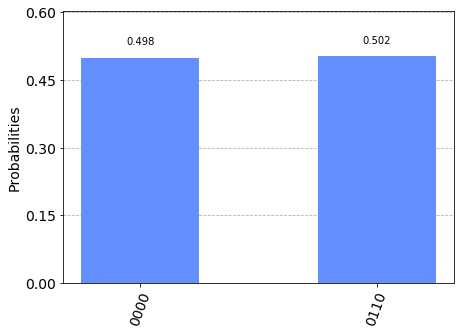

In [15]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
plot_histogram(counts)